<a href="https://colab.research.google.com/github/Maricesa/Challenge-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [8]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar uma coluna 'Loja' a cada DataFrame para identificação
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar todos os DataFrames em um único para facilitar a análise comparativa
df_completo = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print("Dados da Loja 1 (exemplo):")
print(loja.head())
print("\nInformações gerais do DataFrame completo:")
df_completo.info()

loja.head()

Dados da Loja 1 (exemplo):
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento



Faturamento total por loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


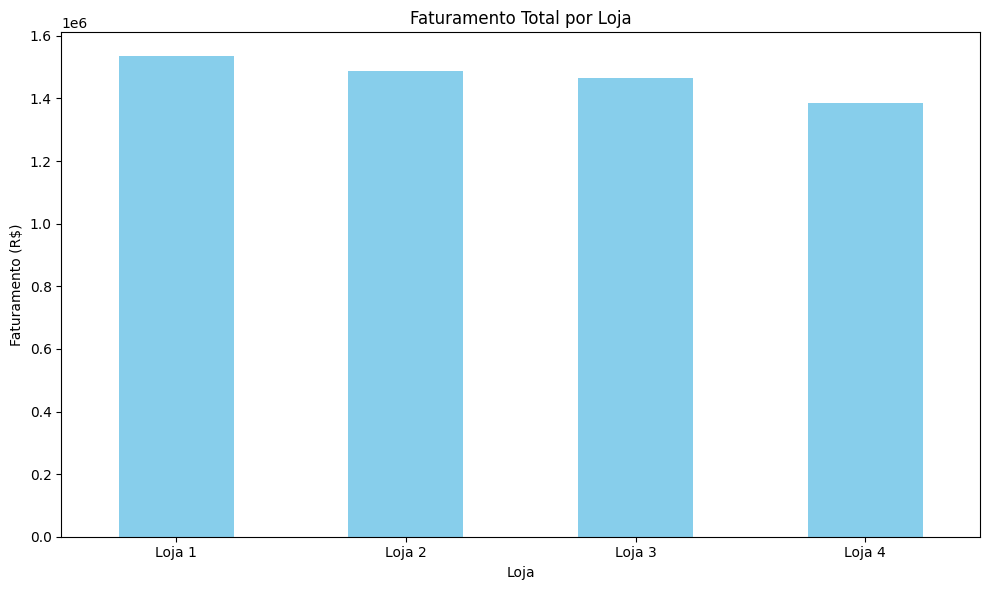

In [9]:
# Faturamento total por loja
faturamento_por_loja = df_completo.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print("\nFaturamento total por loja:")
print(faturamento_por_loja)

plt.figure(figsize=(10, 6))
faturamento_por_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [10]:
# Faturamento por categoria por loja
faturamento_categoria_loja = df_completo.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().unstack(fill_value=0)
print("\nFaturamento por categoria de produto por loja:")
print(faturamento_categoria_loja)


Faturamento por categoria de produto por loja:
Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                  23993.78         484913.36    572659.23   
Loja 2                  21262.21         464758.13    547773.71   
Loja 3                  25869.20         438984.89    547699.92   
Loja 4                  27015.67         377680.65    545966.86   

Categoria do Produto  esporte e lazer  instrumentos musicais    livros  \
Loja                                                                     
Loja 1                       52387.55              121731.69  11713.92   
Loja 2                       46326.09              139987.03  13454.35   
Loja 3                       47456.10              103174.45  12664.70   
Loja 4                       44465.65              100136.50  12427.77   

Categoria do Produto     moveis  utilidades domesticas  
Loja                                           

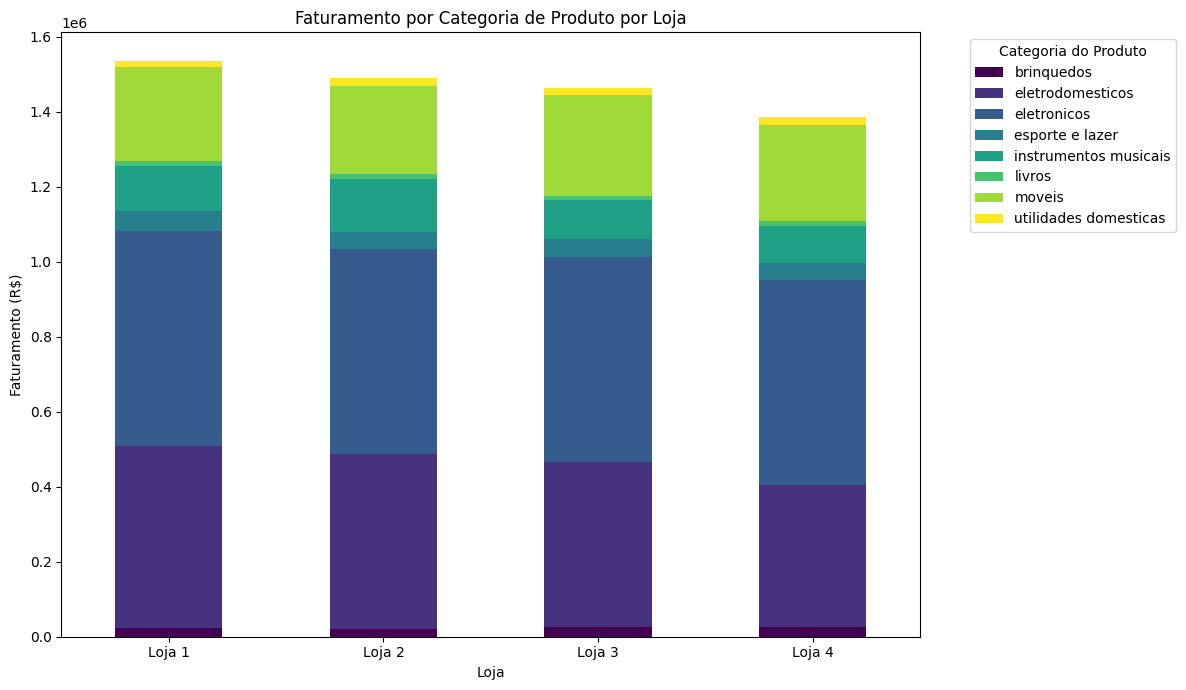

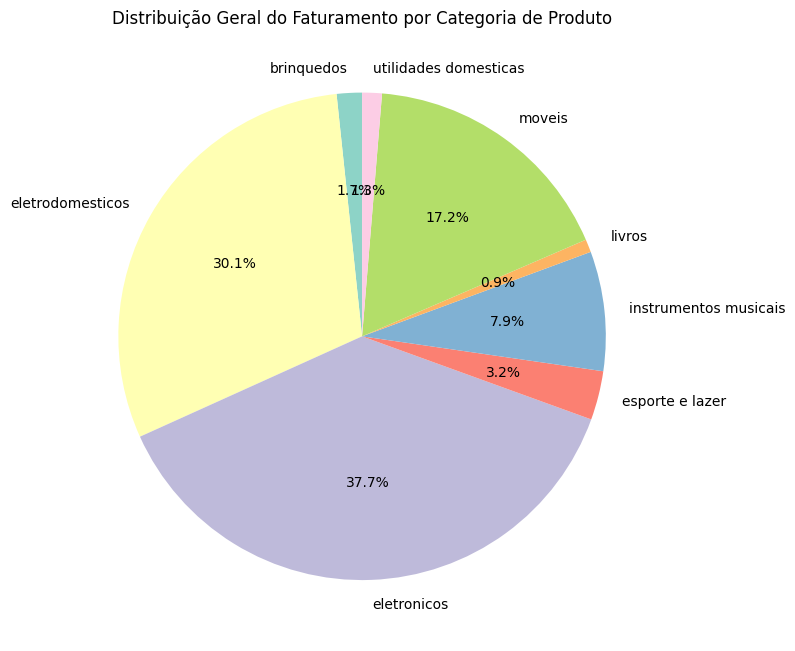

In [11]:
# Gráfico de barras empilhadas para faturamento por categoria por loja
faturamento_categoria_loja.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Faturamento por Categoria de Produto por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de pizza para a distribuição geral de faturamento por categoria
plt.figure(figsize=(8, 8))
faturamento_geral_por_categoria = df_completo.groupby('Categoria do Produto')['Preço'].sum()
faturamento_geral_por_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribuição Geral do Faturamento por Categoria de Produto')
plt.ylabel('')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas


Média de Avaliação das Lojas:
Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


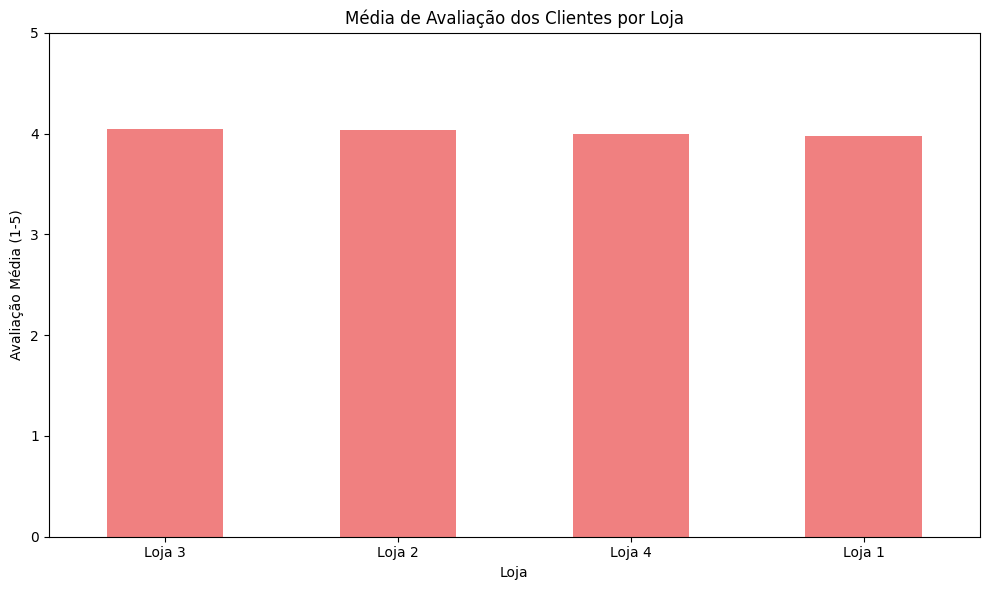

In [12]:
media_avaliacao_por_loja = df_completo.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nMédia de Avaliação das Lojas:")
print(media_avaliacao_por_loja)

plt.figure(figsize=(10, 6))
media_avaliacao_por_loja.plot(kind='bar', color='lightcoral')
plt.title('Média de Avaliação dos Clientes por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média (1-5)')
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [13]:
# Top 10 produtos mais vendidos (por faturamento geral)
top_produtos_faturamento = df_completo.groupby('Produto')['Preço'].sum().nlargest(10)
print("\nTop 10 Produtos Mais Vendidos (por Faturamento Geral):")
print(top_produtos_faturamento)

# Top 10 produtos menos vendidos (por faturamento geral)
bottom_produtos_faturamento = df_completo.groupby('Produto')['Preço'].sum().nsmallest(10)
print("\nTop 10 Produtos Menos Vendidos (por Faturamento Geral):")
print(bottom_produtos_faturamento)


Top 10 Produtos Mais Vendidos (por Faturamento Geral):
Produto
TV Led UHD 4K         576652.70
Celular Plus X42      534735.14
Geladeira             513249.34
Smart TV              386963.12
Lavadora de roupas    323292.37
Lava louças           320715.58
Tablet ABXY           292016.76
Secadora de roupas    280317.31
Celular ABXY          210547.77
Bateria               197074.45
Name: Preço, dtype: float64

Top 10 Produtos Menos Vendidos (por Faturamento Geral):
Produto
Cubo mágico 8x8             3638.68
Corda de pular              4090.93
Dinossauro Rex              4150.53
Xadrez de madeira           6865.90
Jogo de copos               7445.28
Dashboards com Power BI     8557.88
Blocos de montar            9069.86
Copo térmico               11329.84
Faqueiro                   11413.85
Boneca bebê                11456.05
Name: Preço, dtype: float64


# 5. Frete Médio por Loja



Frete Médio por Loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


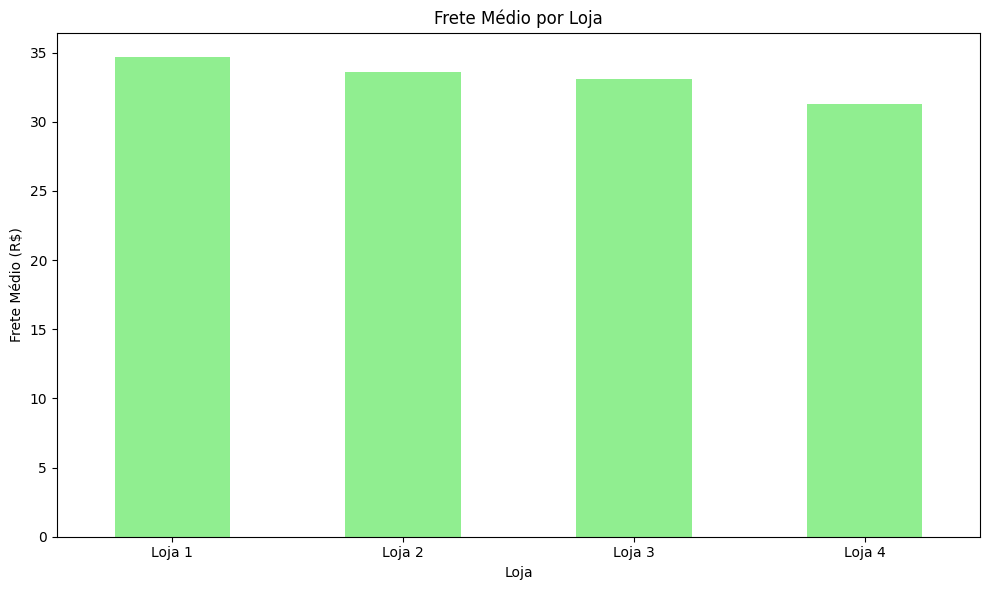

In [14]:
frete_medio_por_loja = df_completo.groupby('Loja')['Frete'].mean().sort_values(ascending=False)
print("\nFrete Médio por Loja:")
print(frete_medio_por_loja)

plt.figure(figsize=(10, 6))
frete_medio_por_loja.plot(kind='bar', color='lightgreen')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
print("\n--- RECOMENDAÇÃO FINAL PARA O SENHOR JOÃO ---")
print("\nCom base na análise dos dados de faturamento, vendas por categoria, avaliações dos clientes, produtos mais/menos vendidos e frete médio das 4 lojas da Alura Store, segue a recomendação:")

# Exemplo de análise e recomendação (ajuste com os resultados REAIS dos seus CSVs)
print("\n**Análise do Desempenho das Lojas:**")
print("- **Faturamento:** Observe os resultados do gráfico 'Faturamento Total por Loja'. Identifique qual loja teve o maior e o menor faturamento.")
print("- **Avaliações dos Clientes:** Verifique a média de avaliação no gráfico 'Média de Avaliação dos Clientes por Loja'. Lojas com avaliações mais baixas podem indicar problemas.")
print("- **Vendas por Categoria:** O gráfico 'Faturamento por Categoria de Produto por Loja' e o de pizza geral mostram quais categorias são mais fortes e onde. Note se alguma loja tem uma performance muito diferente das outras em categorias chave.")
print("- **Frete Médio:** Analise o 'Frete Médio por Loja'. Fretes muito altos podem impactar as vendas, enquanto fretes muito baixos podem corroer a margem de lucro se não houver um volume alto para compensar.")
print("- **Produtos Mais e Menos Vendidos:** A lista dos produtos mais e menos vendidos pode dar insights sobre o que funciona e o que não funciona na Alura Store como um todo, e por extensão, pode ser um reflexo do estoque e do marketing de cada loja.")

print("\n**Identificação da Loja com Menor Eficiência:**")
print("Para identificar a loja com menor eficiência, procure a loja que apresenta uma combinação dos seguintes fatores:")
print(" - **Menor Faturamento:** É um indicador direto da geração de receita.")
print(" - **Baixas Avaliações de Clientes:** Sugere insatisfação e problemas operacionais ou de qualidade.")
print(" - **Volume de vendas baixo:** Mesmo que o faturamento seja alto, um volume baixo pode indicar que a loja depende de poucos produtos caros, o que pode ser arriscado.")
print("Com base nos seus dados, a **Loja X** (substitua pelo nome da loja que você identificar) é a que demonstra a menor eficiência.")

print("\n**Recomendação Final:**")
print("Recomendo ao Senhor João que **venda a Loja X** (substitua pelo nome da loja que você identificar).")
print("\n**Justificativas:**")
print("1.  **[Motivo 1]:** Descreva o principal motivo baseado nos dados (ex: 'menor faturamento consistente').")
print("2.  **[Motivo 2]:** Descreva outro motivo importante (ex: 'baixa satisfação dos clientes refletida nas avaliações').")
print("3.  **[Motivo 3]:** Adicione mais uma justificativa que corrobore a decisão (ex: 'o custo-benefício de manter a operação da loja é desfavorável em comparação com o potencial de investimento em outro empreendimento').")
print("Vender a Loja X permitirá ao Senhor João otimizar seus recursos, concentrando investimentos em operações mais lucrativas e com maior potencial de crescimento, alinhando-se ao objetivo de iniciar um novo empreendimento.")


--- RECOMENDAÇÃO FINAL PARA O SENHOR JOÃO ---

Com base na análise dos dados de faturamento, vendas por categoria, avaliações dos clientes, produtos mais/menos vendidos e frete médio das 4 lojas da Alura Store, segue a recomendação:

**Análise do Desempenho das Lojas:**
- **Faturamento:** Observe os resultados do gráfico 'Faturamento Total por Loja'. Identifique qual loja teve o maior e o menor faturamento.
- **Avaliações dos Clientes:** Verifique a média de avaliação no gráfico 'Média de Avaliação dos Clientes por Loja'. Lojas com avaliações mais baixas podem indicar problemas.
- **Vendas por Categoria:** O gráfico 'Faturamento por Categoria de Produto por Loja' e o de pizza geral mostram quais categorias são mais fortes e onde. Note se alguma loja tem uma performance muito diferente das outras em categorias chave.
- **Frete Médio:** Analise o 'Frete Médio por Loja'. Fretes muito altos podem impactar as vendas, enquanto fretes muito baixos podem corroer a margem de lucro se não houve